In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from caimcaim import CAIMD
from scipy.stats import pearsonr

## CAIBAL with Iris Dataset

In [2]:
#dataset
dataset = pd.read_csv('datasets/irisDataset.csv')
Validation = pd.DataFrame(dataset['Species'])
dataset_clustering = dataset.drop(['Id','Species'], axis=1)
dataset_clustering

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Clustering with K-means

In [11]:
kmeans = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=365)
dataset_with_clusterAtt = dataset_clustering.copy()
dataset_with_clusterAtt['cluster'] = kmeans.fit_predict(dataset_clustering)
dataset_with_clusterAtt

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


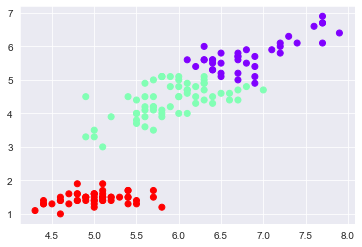

In [4]:
#ploting clusters
plt.scatter(dataset_with_clusterAtt['SepalLengthCm'],dataset_with_clusterAtt['PetalLengthCm'], c=dataset_with_clusterAtt['cluster'], cmap='rainbow')

## Discretizing with CAIM

In [12]:
numAtt = dataset_clustering.copy()
clusterAtt = dataset_with_clusterAtt['cluster']
caim = CAIMD()
dataset_disc = caim.fit_transform(numAtt, clusterAtt)

Categorical [4]
# 0  GLOBAL CAIM  34.218864468864474
# 1  GLOBAL CAIM  22.299132011918644
# 2  GLOBAL CAIM  47.41414141414142
# 3  GLOBAL CAIM  40.77950461389024


In [6]:
#Finding cut points
disc_scheme = pd.DataFrame()
disc_scheme = caim.split_scheme
disc_scheme

{0: [4.3, 5.4, 6.3, 8.9],
 1: [2.0, 3.0, 3.3, 5.4],
 2: [1.0, 1.9, 5.1, 7.9],
 3: [0.1, 0.6, 1.9, 3.5]}

In [7]:
dataset_disc

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,0.0,2.0,0.0,0.0,2.0
1,0.0,1.0,0.0,0.0,2.0
2,0.0,1.0,0.0,0.0,2.0
3,0.0,1.0,0.0,0.0,2.0
4,0.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...
145,2.0,1.0,2.0,2.0,0.0
146,2.0,0.0,1.0,2.0,1.0
147,2.0,1.0,2.0,2.0,0.0
148,1.0,2.0,2.0,2.0,0.0


In [8]:
cluster = pd.DataFrame()
cluster = dataset_disc[dataset_disc['cluster'] == 0]
cluster = cluster.drop(['cluster'], axis=1)

In [9]:
#
all_results = []
result_table = pd.DataFrame();
for (colName, colData) in cluster.items():
    counter_table = pd.crosstab(index=cluster[colName], columns='count', rownames=['ranges'])
    counter_table = counter_table/counter_table.sum()
    all_results.append(counter_table)
result_table = pd.concat(all_results, names=['Feature','range'], keys=cluster.columns)
result_table

col_0                   count
Feature       range          
SepalLengthCm 1.0    0.052632
              2.0    0.947368
SepalWidthCm  0.0    0.263158
              1.0    0.526316
              2.0    0.210526
PetalLengthCm 1.0    0.052632
              2.0    0.947368
PetalWidthCm  1.0    0.263158
              2.0    0.736842

In [10]:
feature_name = result_table.index[0][0]
feature_index = 0
for i_rt in range(result_table.index.size):
    if feature_name != result_table.index[i_rt][0]:
        feature_name = result_table.index[i_rt][0]
        feature_index+=1
    print(result_table.index[i_rt][0],': [',disc_scheme[feature_index][int(result_table.index[i_rt][1])],'-',disc_scheme[feature_index][int(result_table.index[i_rt][1])+1],'] -', result_table.values[i_rt])

SepalLengthCm : [ 5.4 - 6.3 ] - [0.05263158]
SepalLengthCm : [ 6.3 - 8.9 ] - [0.94736842]
SepalWidthCm : [ 2.0 - 3.0 ] - [0.26315789]
SepalWidthCm : [ 3.0 - 3.3 ] - [0.52631579]
SepalWidthCm : [ 3.3 - 5.4 ] - [0.21052632]
PetalLengthCm : [ 1.9 - 5.1 ] - [0.05263158]
PetalLengthCm : [ 5.1 - 7.9 ] - [0.94736842]
PetalWidthCm : [ 0.6 - 1.9 ] - [0.26315789]
PetalWidthCm : [ 1.9 - 3.5 ] - [0.73684211]
